In [1]:
#goal: 
#1 successfully scrape information on 'current squad' for a team present at the euros. 
    #1 cont. present this information in a dataframe format. include the dates of birth of the players. 
    #1 cont. add a column that adds their age at the time the euros started. 
#2 using the age column, aggregate the number of players of that age. display this as a barchart.

#3 create a function that scrapes the web and creates the dataframe automatically.
#4 create a function that further processes that dataframe to add 'age in days at start of euros.' 

In [150]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re

In [ ]:
#notes: https://www.pylenin.com/blogs/web-scraping-python-bs4/#parsing-html-table-with-beautiful-soup

In [3]:
#Polish national football team

In [129]:
inputlink = "https://en.wikipedia.org/wiki/Poland_national_football_team"

In [130]:
response = requests.get(inputlink)
footballsoup = BeautifulSoup(response.text, "html.parser")

In [131]:
print(footballsoup.title)
print(footballsoup.title.name)
print(footballsoup.title.string)

<title>Poland national football team - Wikipedia</title>
title
Poland national football team - Wikipedia


#

In [107]:
#how many tables?
print(len(footballsoup.find_all("table")))

81


In [132]:
#sortable wikitable plainrowheaders
playertable = footballsoup.find("table",{"class":"sortable wikitable plainrowheaders"})

In [133]:
print(playertable)

<table class="sortable wikitable plainrowheaders" style="font-size:100%; width: 98%">
<tbody><tr>
<th scope="col" style="width:4%"><abbr title="Number">No.</abbr>
</th>
<th scope="col" style="width:4%"><abbr title="Position">Pos.</abbr>
</th>
<th scope="col">Player
</th>
<th scope="col">Date of birth (age)
</th>
<th scope="col" style="width:8%">Caps
</th>
<th scope="col" style="width:8%">Goals
</th>
<th scope="col">Club
</th></tr>
<tr class="nat-fs-player">
<td>1
</td>
<td><span style="display:none">1</span><a href="/wiki/Goalkeeper_(association_football)" title="Goalkeeper (association football)">GK</a>
</td>
<th scope="row"><a href="/wiki/Wojciech_Szcz%C4%99sny" title="Wojciech Szczęsny">Wojciech Szczęsny</a>
</th>
<td style="text-align:left"><span style="display:none"> (<span class="bday">1990-04-18</span>) </span>18 April 1990<span class="noprint ForceAgeToShow"> (age 31)</span>
</td>
<td>56
</td>
<td>0
</td>
<td style="text-align:left"><span class="flagicon"><a href="/wiki/Italian

In [134]:
type(playertable)

bs4.element.Tag

In [135]:
playerdf = pd.read_html(str(playertable))

In [136]:
playerdf = pd.DataFrame(playerdf[0])

In [137]:
print(playerdf.head())

    No. Pos.             Player Date of birth (age)  Caps  Goals  \
0   1.0   GK  Wojciech Szczęsny            (age 31)  56.0    0.0   
1  12.0   GK   Łukasz Skorupski            (age 30)   4.0    0.0   
2  22.0   GK   Łukasz Fabiański            (age 36)  56.0    0.0   
3   NaN  NaN                NaN                 NaN   NaN    NaN   
4   2.0   DF   Kamil Piątkowski            (age 21)   2.0    0.0   

                Club  
0           Juventus  
1            Bologna  
2    West Ham United  
3                NaN  
4  Red Bull Salzburg  


In [203]:
#clean
playerdata = playerdf.drop(["No.","Pos.","Caps","Goals"], axis=1)
#rename columns
playerdata.rename(columns = {"Date of birth (age)":"Age"}, inplace=True)

In [204]:
print(playerdata)

                          Player       Age                    Club
0              Wojciech Szczęsny  (age 31)                Juventus
1               Łukasz Skorupski  (age 30)                 Bologna
2               Łukasz Fabiański  (age 36)         West Ham United
3                            NaN       NaN                     NaN
4               Kamil Piątkowski  (age 21)       Red Bull Salzburg
5               Paweł Dawidowicz  (age 26)           Hellas Verona
6                Tomasz Kędziora  (age 27)             Dynamo Kyiv
7                   Jan Bednarek  (age 25)             Southampton
8                   Maciej Rybus  (age 31)        Lokomotiv Moscow
9      Kamil Glik (vice-captain)  (age 33)               Benevento
10           Bartosz Bereszyński  (age 29)               Sampdoria
11                  Michał Helik  (age 25)                Barnsley
12             Tymoteusz Puchacz  (age 22)            Union Berlin
13                           NaN       NaN                    

In [208]:
#drop NA and clean up data in age col
#regex https://stackoverflow.com/questions/50490540/replace-a-character-in-a-python-dataframe-column
playerdata = playerdata.dropna()
playerdata["Age"] = playerdata["Age"].str.replace("[(\[]age\s", "",regex=True)
playerdata["Age"] = playerdata["Age"].str.replace("[)\[]", "",regex=True)
playerdata

,Player,Age,Club
0,Wojciech Szczęsny,31,Juventus
1,Łukasz Skorupski,30,Bologna
2,Łukasz Fabiański,36,West Ham United
4,Kamil Piątkowski,21,Red Bull Salzburg
5,Paweł Dawidowicz,26,Hellas Verona
6,Tomasz Kędziora,27,Dynamo Kyiv
7,Jan Bednarek,25,Southampton
8,Maciej Rybus,31,Lokomotiv Moscow
9,Kamil Glik (vice-captain),33,Benevento
10,Bartosz Bereszyński,29,Sampdoria


In [209]:
#https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/
age_information = pd.DataFrame(playerdata["Age"].value_counts())

In [210]:
print(age_information)

    Age
31    4
26    3
27    2
25    2
22    2
23    2
24    2
30    1
36    1
21    1
33    1
29    1
17    1
32    1
28    1


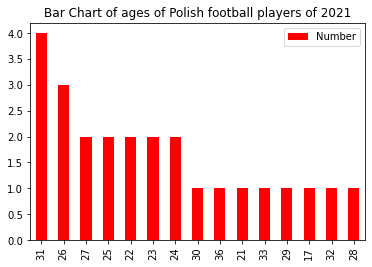

In [216]:
age_information.plot(kind="bar", color="red", title="Bar Chart of ages of Polish football players of 2021")
plt.show()